In [53]:
import numpy as np # for data manipulation
import pandas as pd # for data manipulation

import matplotlib.pyplot as plt # for data visualization
%matplotlib inline # Allows us to print in Jupyter.

import tensorflow as tf # machine learning library.

In [54]:
MNIST = tf.keras.datasets.mnist # import our data

(X_train, y_train), (x_test, y_test) = MNIST.load_data()
''' We split our data into a training set to fit the model 
onto, and a testing set to evaluate the model with. '''

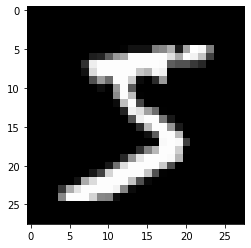

In [55]:
plt.imshow(X_train[0],cmap='gist_gray')

In [56]:
''' Normalizing our data: pixel values in each array
will now range from 0-1. This is a common practice.'''
X_train = tf.keras.utils.normalize(X_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

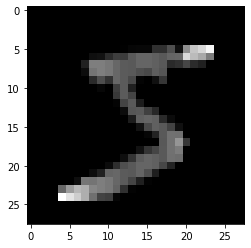

In [57]:
plt.imshow(X_train[0],cmap='gist_gray')

In [58]:
#Defining our model using Tensorflow / Keras:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential() # defining model object as a sequence of layers.

#input layer of ANN:
model.add(Flatten()) ''' The "Flatten" layer converts the 2D 
array of pixel values (the "image") into a one dimensional series.'''

# hidden layers of ANN:
'''hidden layers: "Dense" meaning each neuron in one layer is 
connected to every neuron in the next layer.
A recitified linear unit is a common activation function '''

model.add(Dense(64, activation='relu')) # 64 neurons 
model.add(Dense(32, activation='relu')) # 32 neurons

#output layer of ANN:
''' We are preforming multi class classfication, therefore we 
need an output neuron for each number an image could represent, 10.

Each class is mutually exclusive, therefore we use softmax as our
activation function. Each output neuron will represent the 
probability that an image was the number ranging from 0-9. '''

model.add(Dense(10, activation='softmax')) # 10 neurons

'''We will optimize gradient descent with the adam optimizer.
Cross entropy is a common loss function for classfication.
We will keep track of the accuracy metric whilst parsing data'''

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])


In [59]:
model.fit(X_train, y_train, epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3344 - accuracy: 0.9053
Epoch 2/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1562 - accuracy: 0.9533
Epoch 3/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1127 - accuracy: 0.9660


In [60]:
losses = pd.DataFrame(model.history.history)

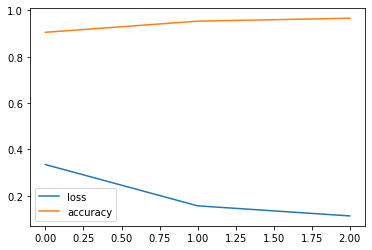

In [67]:
losses.plot()

In [61]:
from sklearn.metrics import classification_report

In [62]:
predictions = np.argmax(model.predict(x_test), axis=-1)

In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       980
           1       0.98      0.98      0.98      1135
           2       0.96      0.97      0.96      1032
           3       0.95      0.96      0.95      1010
           4       0.96      0.96      0.96       982
           5       0.96      0.96      0.96       892
           6       0.96      0.97      0.97       958
           7       0.97      0.97      0.97      1028
           8       0.94      0.95      0.95       974
           9       0.98      0.92      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



In [64]:
print(confusion_matrix(y_test,predictions))

[[ 960    0    3    1    0    3    6    2    4    1]
 [   0 1114    5    0    0    0    3    1   12    0]
 [   4    1  999    7    3    0    5    6    7    0]
 [   0    0    6  969    2   12    1    6   12    2]
 [   0    0    7    0  946    0   12    5    5    7]
 [   4    0    1    8    2  860    9    1    5    2]
 [   6    2    2    0    2    9  934    0    3    0]
 [   3    4   15    8    2    0    0  993    0    3]
 [   4    3    4   13    5    4    5    5  929    2]
 [   5    8    2   14   20   11    0   10   10  929]]


In [68]:
model.save("YahyaModel.h5")